In [1]:
# install infercnvpy in the anaconda powershell
!pip install infercnvpy

  Created wheel for gtfparse: filename=gtfparse-1.2.1-py3-none-any.whl size=11637 sha256=22fb250596470748cd78dfc707732b9e23d03f3aad81df04cafe1aab3c283668
  Stored in directory: c:\users\kko1\appdata\local\pip\cache\wheels\42\41\84\ad98464a56fd4a362456674f539ed7123205efa0bb432fe9bb
Successfully built gtfparse


In [1]:
#import infercnvpy as cnv
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import scipy
sc.settings.verbosity = 3
sc.logging.print_header()
sc.set_figure_params(dpi=100, dpi_save=600)
    
import scvelo as scv
scv.settings.verbosity = 3
scv.settings.presenter_view = True
scv.logging.print_versions()


import matplotlib.pyplot as pl
from matplotlib import rcParams

scanpy==1.9.1 anndata==0.9.2 umap==0.5.2 numpy==1.21.5 scipy==1.8.0 pandas==1.4.2 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.9.9 pynndescent==0.5.6
scvelo==0.2.4  scanpy==1.9.1  anndata==0.9.2  loompy==3.0.7  numpy==1.21.5  scipy==1.8.0  matplotlib==3.4.3  sklearn==1.0.2  pandas==1.4.2  


In [2]:
import seaborn as sns

In [3]:
import scvelo as scv

In [4]:
import os
os.chdir('D:/KP/EKP_RKP')

In [5]:
adata= sc.read('EKP_and_RKP_velocity_overlaid_07-29-24.h5ad')
adata

AnnData object with n_obs × n_vars = 1832 × 20470
    obs: 'batch', 'sample_batch', 'tissue', 'type', 'leiden', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rpl', 'pct_counts_rpl', 'total_counts_rps', 'pct_counts_rps', 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'n_counts', 'velocity_self_transition', 'root_cells', 'end_points', 'velocity_pseudotime', 'latent_time', 'velocity_length', 'velocity_confidence', 'velocity_confidence_transition', 'scvelo_leiden', 'celltype'
    var: 'gene_ids', 'feature_types', 'n_cells', 'mt', 'rpl', 'rps', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'mean', 'std'
    uns: 'EKP_RKP_Tumor_rank_fgsea', 'Leiden_Tumor_rank_fgsea', 'celltype_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'tissue_colors', 'type_colors', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distanc

# Add Scissor information in adata

# Scissor values were calculated in R
# This is done after 15_1_Scissor_DGAC...R

In [189]:
DGAC = pd.read_csv('D:/KP/EKP_RKP/Scissor/Scissor_normal_DGAC_a0.01.csv')
DGAC

,Scissor_select
AAACCCACAGTATGAA,1
AAACGAAAGTAGGGTC,2
AAACGAATCTCGCTTG,2
AAACGCTAGTGGCGAT,1
AAACGCTCATGGAATA,1
...,...
TTTGATCCATGACTTG,2
TTTGGAGGTCTCGCGA,0
TTTGGAGTCATGGTAC,2
TTTGTTGCAACAGCCC,0


In [190]:
SRCC = pd.read_csv('D:/KP/EKP_RKP/Scissor/Scissor_normal_SRCC_a0.01.csv')
SRCC

,Scissor_select
AAACCCACAGTATGAA,1
AAACGAAAGTAGGGTC,2
AAACGAATCTCGCTTG,2
AAACGCTAGTGGCGAT,1
AAACGCTCATGGAATA,1
...,...
TTTGATCCATGACTTG,2
TTTGGAGGTCTCGCGA,2
TTTGGAGTCATGGTAC,2
TTTGTTGCAACAGCCC,0


In [191]:
mucinous = pd.read_csv('D:/KP/EKP_RKP/Scissor/Scissor_normal_mucinous_a0.01.csv')
mucinous

,Scissor_select
AAACCCACAGTATGAA,1
AAACGAAAGTAGGGTC,2
AAACGAATCTCGCTTG,0
AAACGCTAGTGGCGAT,1
AAACGCTCATGGAATA,1
...,...
TTTGATCCATGACTTG,2
TTTGGAGGTCTCGCGA,1
TTTGGAGTCATGGTAC,2
TTTGTTGCAACAGCCC,1


In [192]:
NOS_vs_SRCC = pd.read_csv('D:/KP/EKP_RKP/Scissor/Scissor_NOS_SRCC_a0.01.csv')
NOS_vs_SRCC

,Scissor_select
AAACCCACAGTATGAA,0
AAACGAAAGTAGGGTC,0
AAACGAATCTCGCTTG,0
AAACGCTAGTGGCGAT,0
AAACGCTCATGGAATA,0
...,...
TTTGATCCATGACTTG,0
TTTGGAGGTCTCGCGA,0
TTTGGAGTCATGGTAC,0
TTTGTTGCAACAGCCC,0


In [193]:
adata.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,scvelo_leiden,celltype,scissor_DGAC,scissor_SRCC,scissor_mucinous,scissor_DGAC_cat,scissor_SRCC_cat,scissor_mucinous_cat,scissor_NOS_SRCC,scissor_SRCC(vs.NOS)_cat
AAACCCACAGTATGAA,0,-1-0,allograft,EKP,0,3835,3835,16059.0,1046.0,6.513482,...,0,Zeb2+ cell_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
AAACGAAAGTAGGGTC,0,-1-0,allograft,EKP,2,338,338,1239.0,1.0,0.080710,...,5,Cd63+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
AAACGAATCTCGCTTG,0,-1-0,allograft,EKP,2,656,656,1903.0,570.0,29.952705,...,4,Cdk8+ cell_1,2,2,0,DGAC_positive,SRCC_positive,mucinous_null,0,SRCC(vs.NOS)_null
AAACGCTAGTGGCGAT,0,-1-0,allograft,EKP,0,4898,4898,26809.0,977.0,3.644298,...,1,Runx2/Runx3+ cell_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
AAACGCTCATGGAATA,0,-1-0,allograft,EKP,0,4000,4000,21023.0,548.0,2.606669,...,2,Runx1+ stem_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATGACTTG,1,-1-1,allograft,RKP,2,694,694,1473.0,2.0,0.135777,...,3,Eno1+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
TTTGGAGGTCTCGCGA,1,-1-1,allograft,RKP,2,1346,1346,4412.0,80.0,1.813237,...,3,Eno1+ cell,0,2,1,DGAC_null,SRCC_positive,mucinous_negative,0,SRCC(vs.NOS)_null
TTTGGAGTCATGGTAC,1,-1-1,allograft,RKP,2,294,294,625.0,7.0,1.120000,...,1,Hdc/Cd24a+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
TTTGTTGCAACAGCCC,1,-1-1,allograft,RKP,1,236,236,940.0,617.0,65.638298,...,7,Cdk8+ cell_2,0,0,1,DGAC_null,SRCC_null,mucinous_negative,0,SRCC(vs.NOS)_null


In [194]:
adata.obs['scissor_DGAC'] = DGAC['Scissor_select']
adata.obs['scissor_SRCC'] = SRCC['Scissor_select']
adata.obs['scissor_mucinous'] = mucinous['Scissor_select']
adata.obs['scissor_NOS_SRCC'] = NOS_vs_SRCC['Scissor_select']

In [195]:
adata.obs.scissor_DGAC = adata.obs.scissor_DGAC.astype('category')
adata.obs.scissor_SRCC = adata.obs.scissor_SRCC.astype('category')
adata.obs.scissor_mucinous = adata.obs.scissor_mucinous.astype('category')
adata.obs.scissor_NOS_SRCC = adata.obs.scissor_NOS_SRCC.astype('category')

In [196]:
adata.obs['scissor_DGAC']

AAACCCACAGTATGAA    1
AAACGAAAGTAGGGTC    2
AAACGAATCTCGCTTG    2
AAACGCTAGTGGCGAT    1
AAACGCTCATGGAATA    1
                   ..
TTTGATCCATGACTTG    2
TTTGGAGGTCTCGCGA    0
TTTGGAGTCATGGTAC    2
TTTGTTGCAACAGCCC    0
TTTGTTGCAGGATTCT    1
Name: scissor_DGAC, Length: 1832, dtype: category
Categories (3, int64): [0, 1, 2]

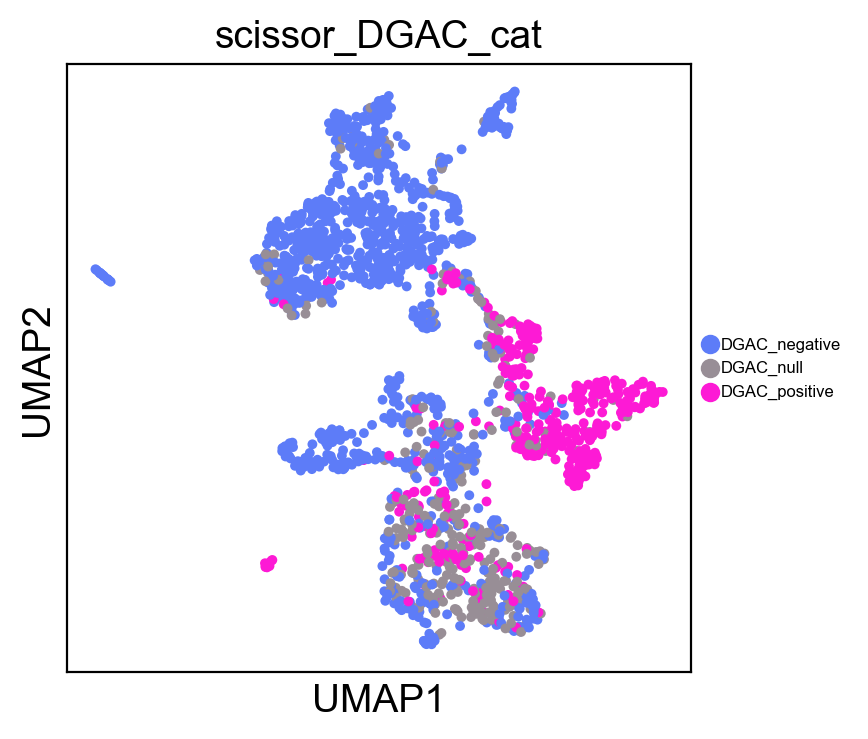

In [197]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'DGAC_null':[0],
              'DGAC_negative': [1],
              'DGAC_positive': [2],
             }

# Initialize empty column in cell metadata
adata.obs['scissor_DGAC_cat'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.scissor_DGAC).isin(cell_dict[i])
    adata.obs.loc[ind,'scissor_DGAC_cat'] = i

sc.pl.umap(adata, color=['scissor_DGAC_cat'], legend_loc='right margin', size=50, legend_fontsize=6)#, save='_RKP_by_celltype.pdf')


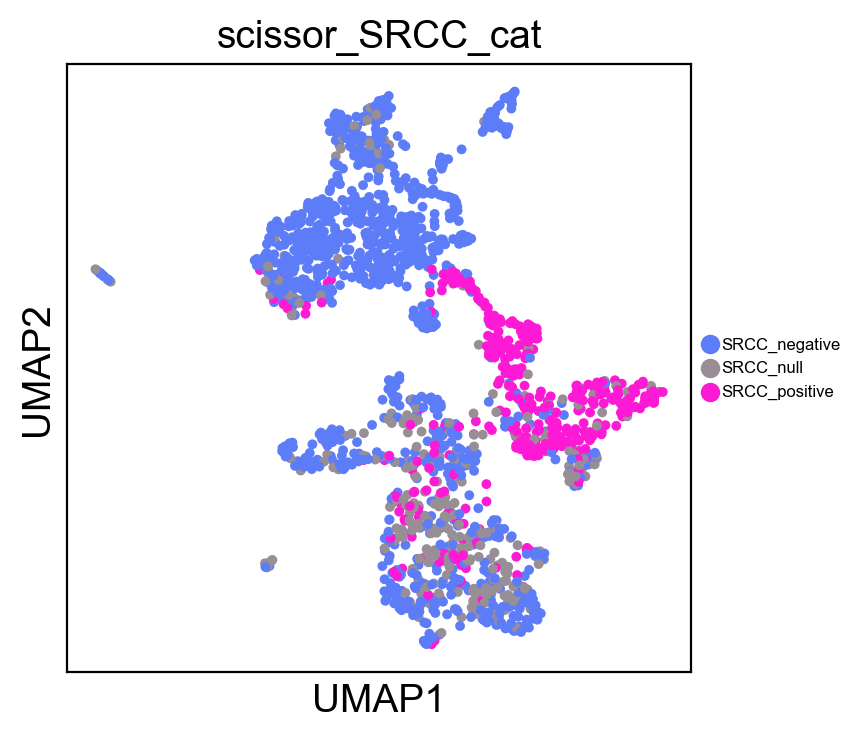

In [198]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'SRCC_null':[0],
              'SRCC_negative': [1],
              'SRCC_positive': [2],
             }

# Initialize empty column in cell metadata
adata.obs['scissor_SRCC_cat'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.scissor_SRCC).isin(cell_dict[i])
    adata.obs.loc[ind,'scissor_SRCC_cat'] = i

sc.pl.umap(adata, color=['scissor_SRCC_cat'], legend_loc='right margin', size=50, legend_fontsize=6)#, save='_RKP_by_celltype.pdf')


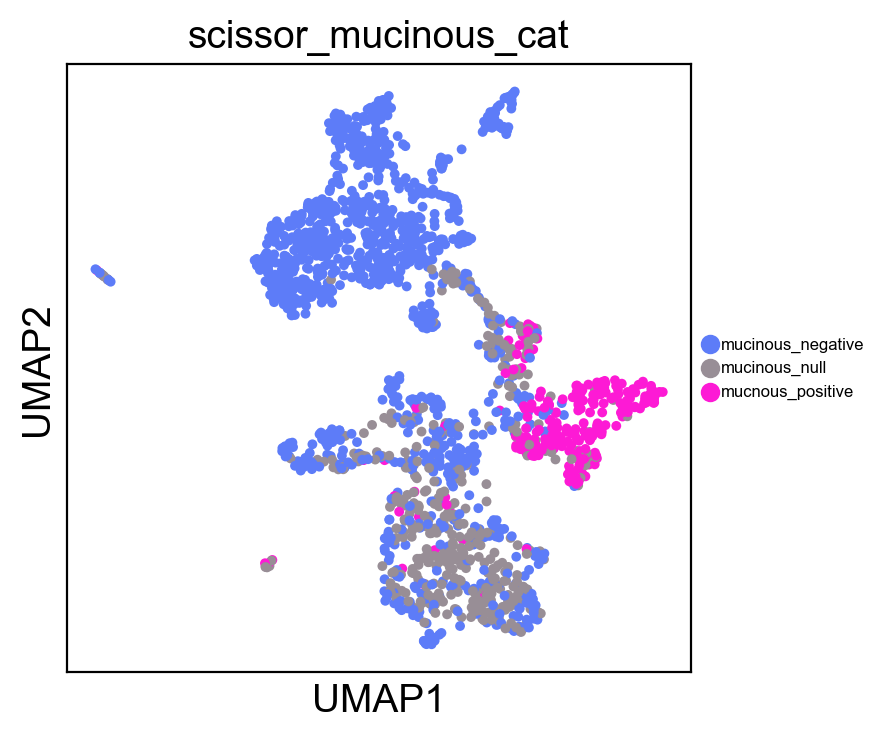

In [199]:
# Fill in the clusters that belong to each cell type based on each marker in the plot above
cell_dict = {'mucinous_null':[0],
              'mucinous_negative': [1],
              'mucnous_positive': [2],
             }

# Initialize empty column in cell metadata
adata.obs['scissor_mucinous_cat'] = np.nan

# Generate new assignments
for i in cell_dict.keys():
    ind = pd.Series(adata.obs.scissor_mucinous).isin(cell_dict[i])
    adata.obs.loc[ind,'scissor_mucinous_cat'] = i

sc.pl.umap(adata, color=['scissor_mucinous_cat'], legend_loc='right margin', size=50, legend_fontsize=6)#, save='_RKP_by_celltype.pdf')


In [201]:
adata.obs

,batch,sample_batch,tissue,type,leiden,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,...,scvelo_leiden,celltype,scissor_DGAC,scissor_SRCC,scissor_mucinous,scissor_DGAC_cat,scissor_SRCC_cat,scissor_mucinous_cat,scissor_NOS_SRCC,scissor_SRCC(vs.NOS)_cat
AAACCCACAGTATGAA,0,-1-0,allograft,EKP,0,3835,3835,16059.0,1046.0,6.513482,...,0,Zeb2+ cell_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
AAACGAAAGTAGGGTC,0,-1-0,allograft,EKP,2,338,338,1239.0,1.0,0.080710,...,5,Cd63+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
AAACGAATCTCGCTTG,0,-1-0,allograft,EKP,2,656,656,1903.0,570.0,29.952705,...,4,Cdk8+ cell_1,2,2,0,DGAC_positive,SRCC_positive,mucinous_null,0,SRCC(vs.NOS)_null
AAACGCTAGTGGCGAT,0,-1-0,allograft,EKP,0,4898,4898,26809.0,977.0,3.644298,...,1,Runx2/Runx3+ cell_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
AAACGCTCATGGAATA,0,-1-0,allograft,EKP,0,4000,4000,21023.0,548.0,2.606669,...,2,Runx1+ stem_1,1,1,1,DGAC_negative,SRCC_negative,mucinous_negative,0,SRCC(vs.NOS)_null
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCATGACTTG,1,-1-1,allograft,RKP,2,694,694,1473.0,2.0,0.135777,...,3,Eno1+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
TTTGGAGGTCTCGCGA,1,-1-1,allograft,RKP,2,1346,1346,4412.0,80.0,1.813237,...,3,Eno1+ cell,0,2,1,DGAC_null,SRCC_positive,mucinous_negative,0,SRCC(vs.NOS)_null
TTTGGAGTCATGGTAC,1,-1-1,allograft,RKP,2,294,294,625.0,7.0,1.120000,...,1,Hdc/Cd24a+ cell,2,2,2,DGAC_positive,SRCC_positive,mucnous_positive,0,SRCC(vs.NOS)_null
TTTGTTGCAACAGCCC,1,-1-1,allograft,RKP,1,236,236,940.0,617.0,65.638298,...,7,Cdk8+ cell_2,0,0,1,DGAC_null,SRCC_null,mucinous_negative,0,SRCC(vs.NOS)_null


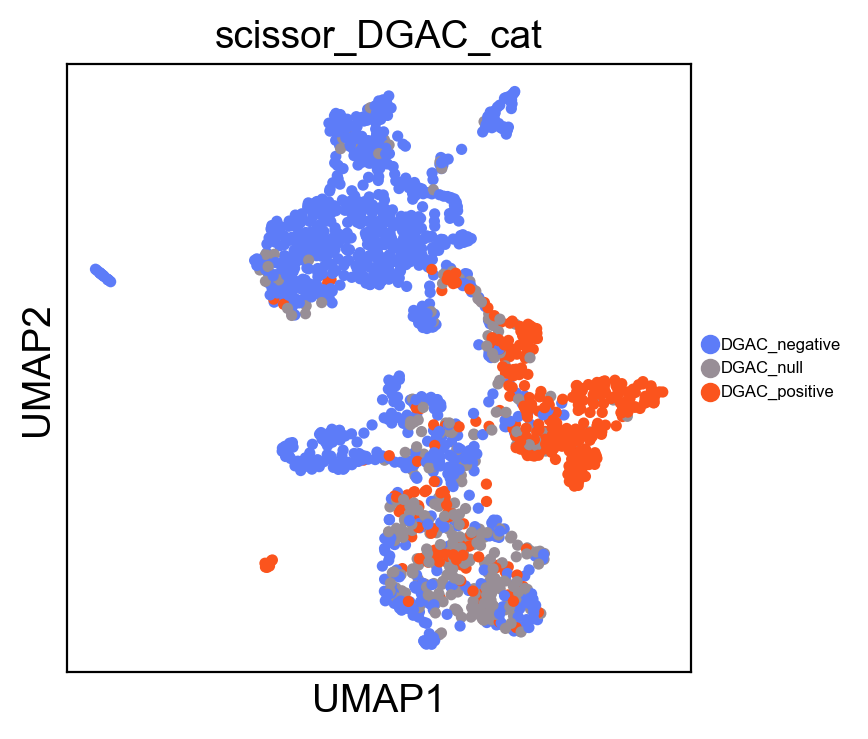

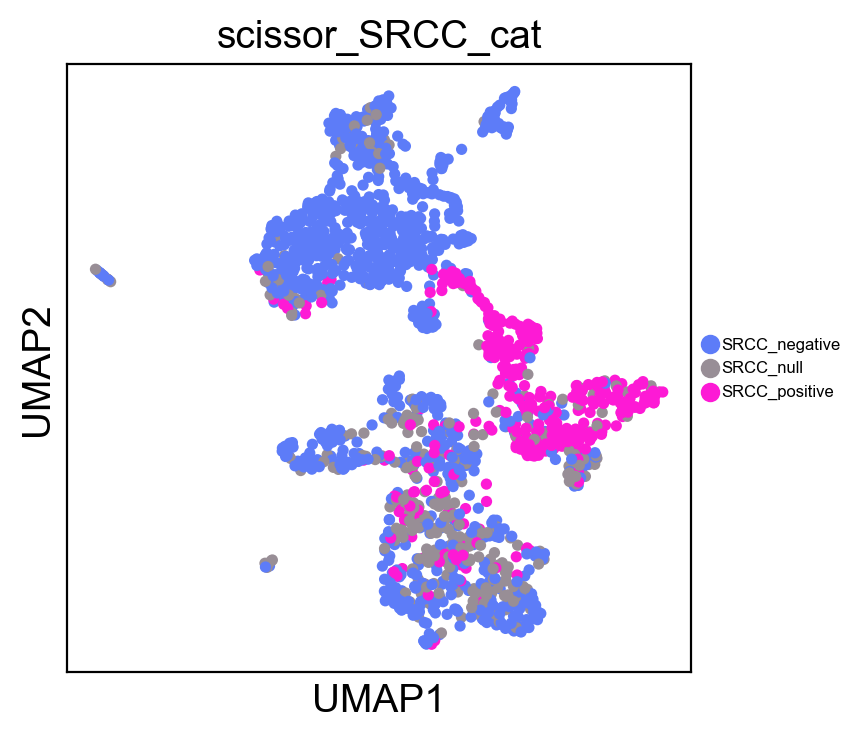

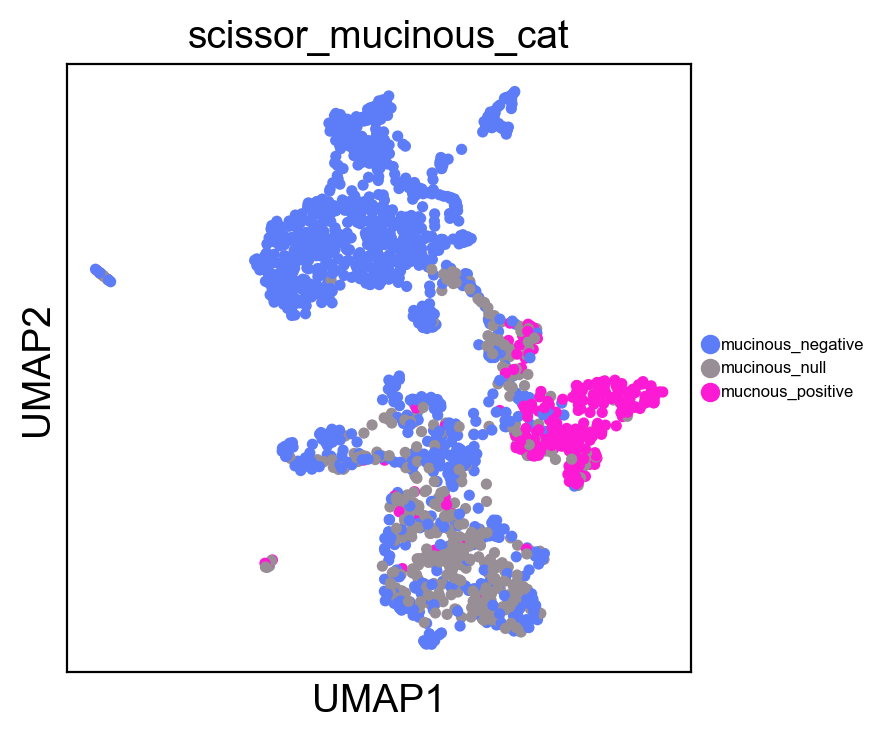

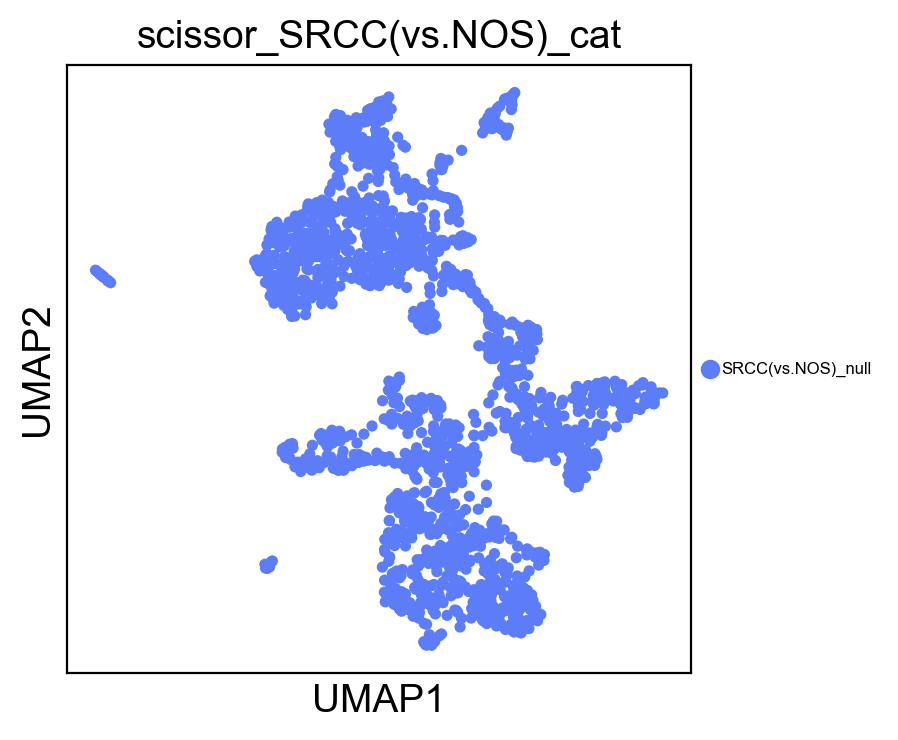

In [207]:
sc.pl.umap(adata, color=['scissor_DGAC_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#5d7cf8","#988e96","#fb541d"], save='_scissor_DGAC_in_EKP_RKP.pdf')
sc.pl.umap(adata, color=['scissor_SRCC_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#5d7cf8","#988e96","#fd1ad5"], save='_scissor_SRCC_in_EKP_RKP.pdf')
sc.pl.umap(adata, color=['scissor_mucinous_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#5d7cf8","#988e96","#fd1ad5"], save='_scissor_mucinous_in_EKP_RKP.pdf')
sc.pl.umap(adata, color=['scissor_SRCC(vs.NOS)_cat'], legend_loc='right margin', legend_fontsize=6, palette=["#5d7cf8","#988e96","#fd1ad5"], save='_scissor_SRCC(vs.NOS)_in_EKP_RKP.pdf')

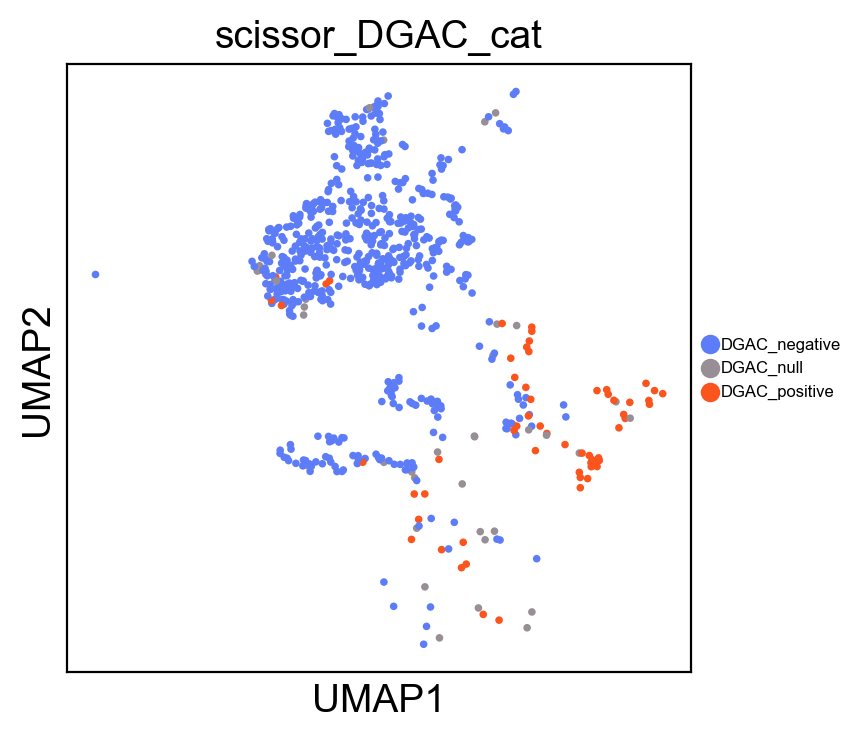

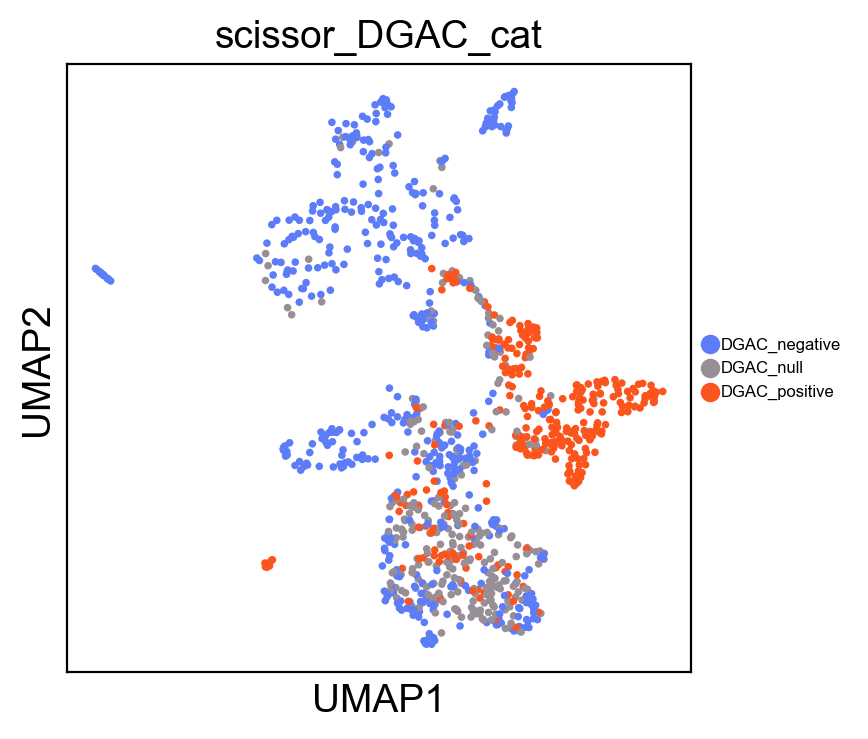

In [208]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['scissor_DGAC_cat'], legend_loc='right margin',palette=["#5d7cf8","#988e96","#fb541d"], legend_fontsize=6, size=30, save='_scissor_DGAC_in_EKP.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['scissor_DGAC_cat'], legend_loc='right margin',palette=["#5d7cf8","#988e96","#fb541d"], legend_fontsize=6, size=30, save='_scissor_DGAC_in_RKP.pdf')

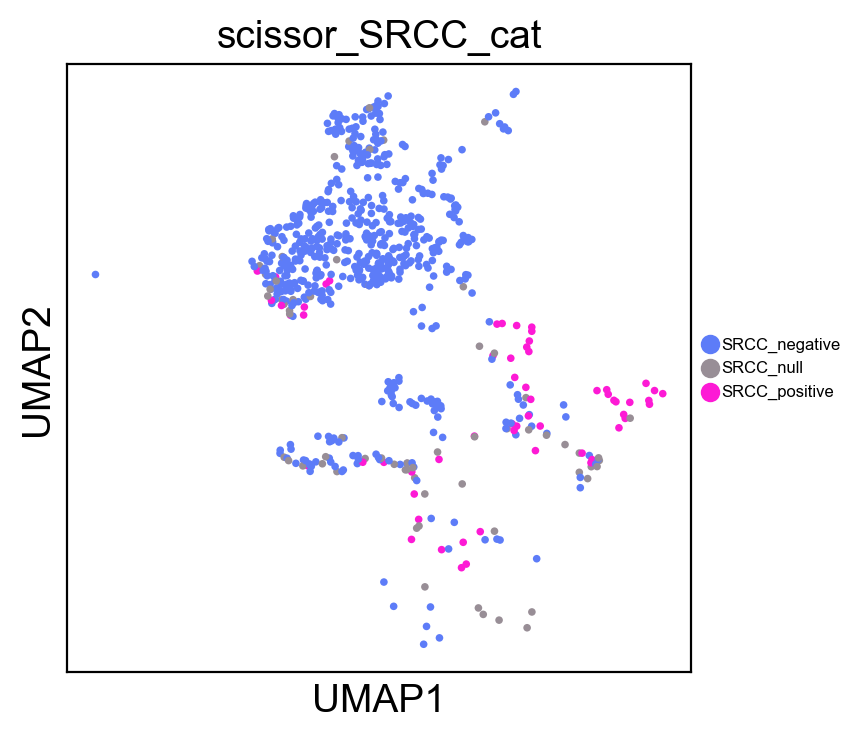

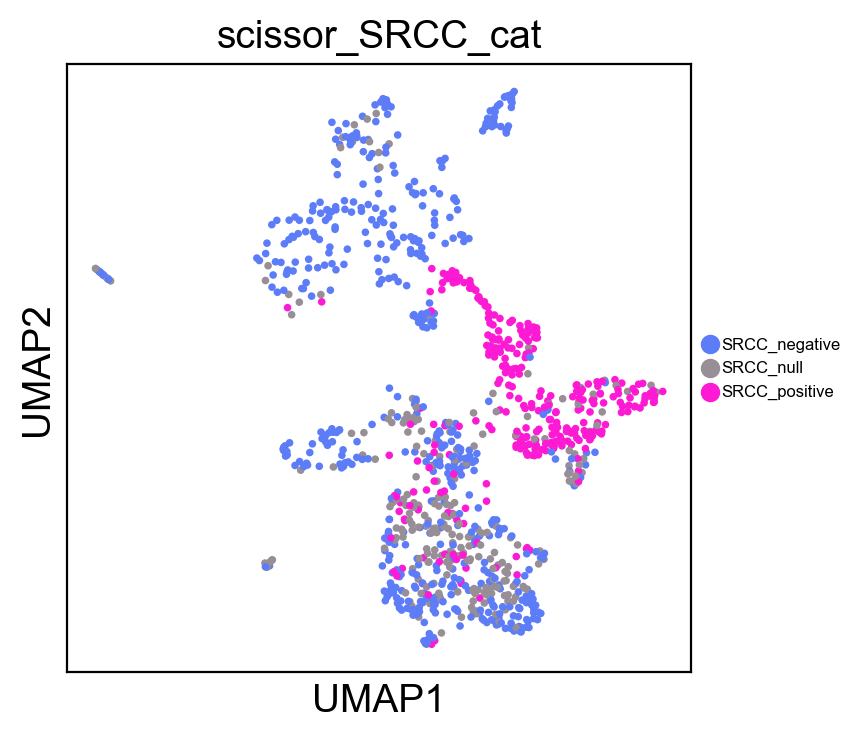

In [204]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['scissor_SRCC_cat'], legend_loc='right margin',palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30, save='_scissor_SRCC_in_EKP.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['scissor_SRCC_cat'], legend_loc='right margin',palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30, save='_scissor_SRCC_in_RKP.pdf')

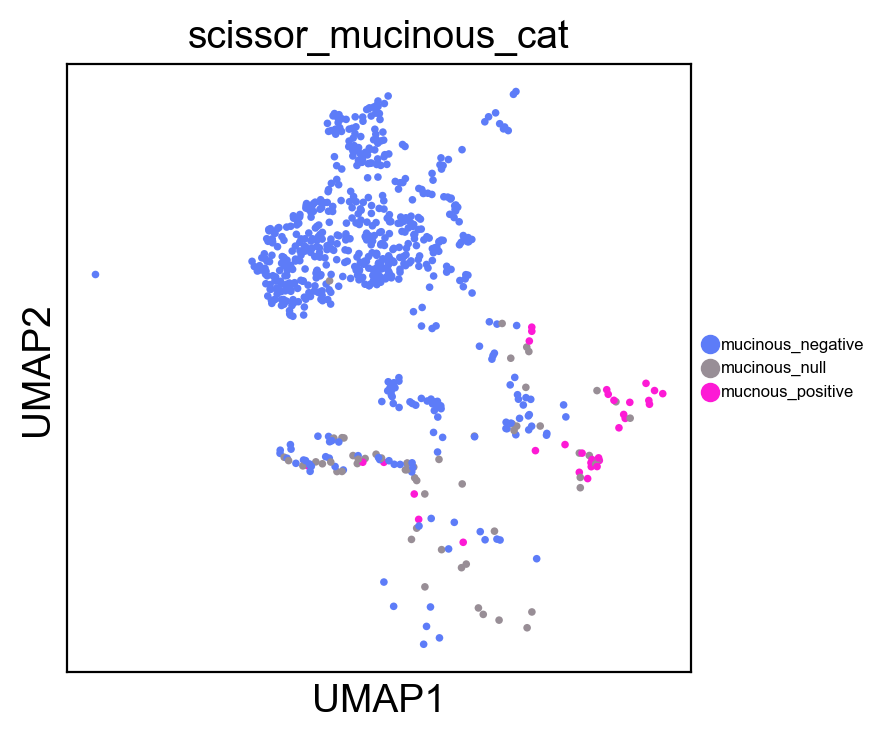

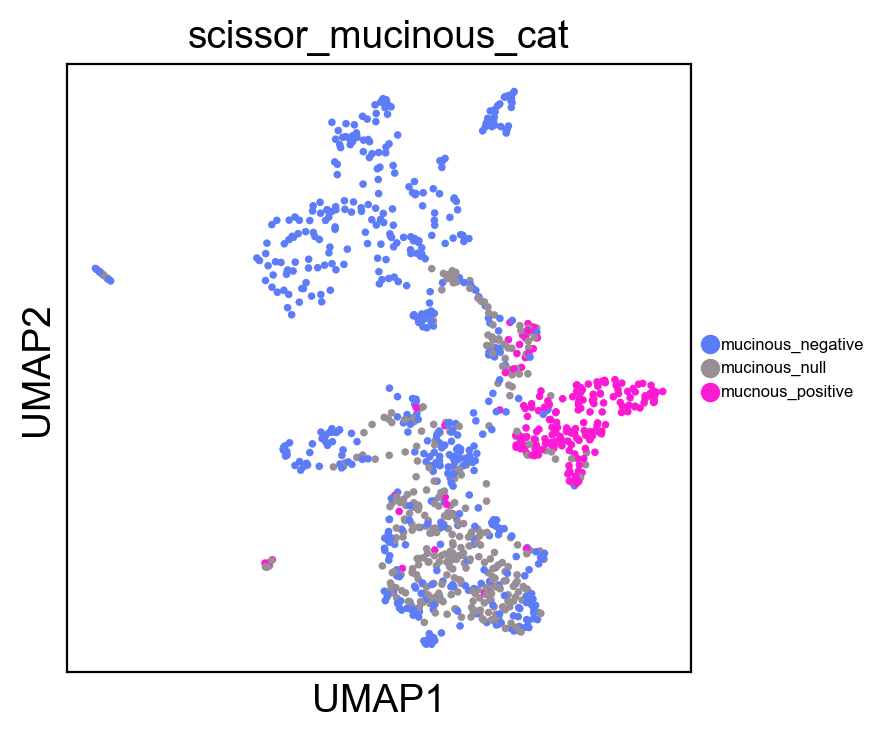

In [205]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['scissor_mucinous_cat'], legend_loc='right margin', palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30, save='_scissor_mucinous_in_EKP.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['scissor_mucinous_cat'], legend_loc='right margin', palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30,  save='_scissor_mucinous_in_RKP.pdf')

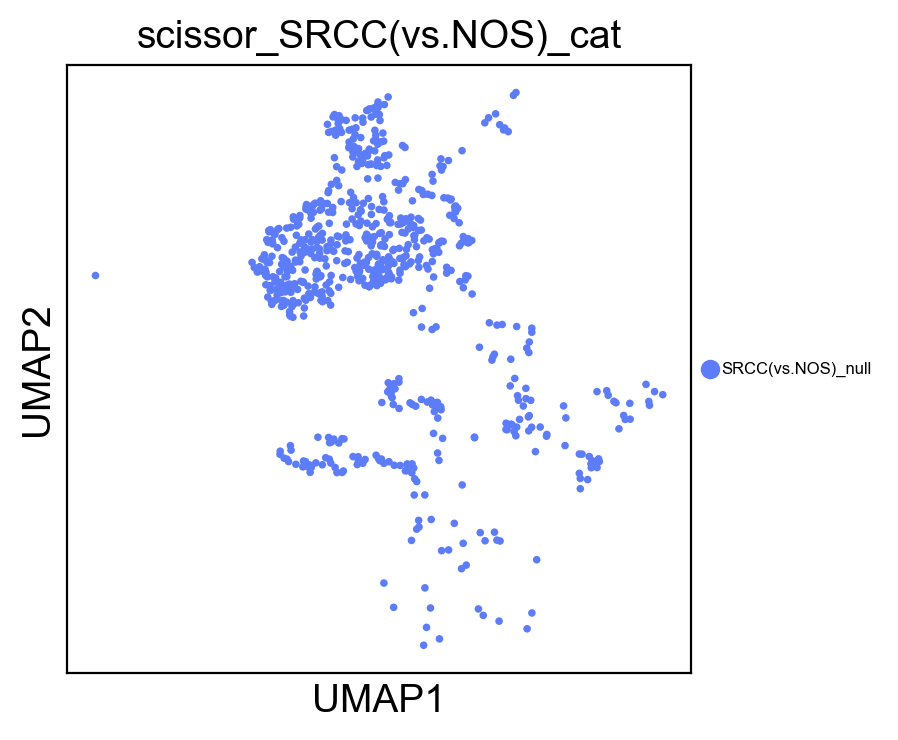

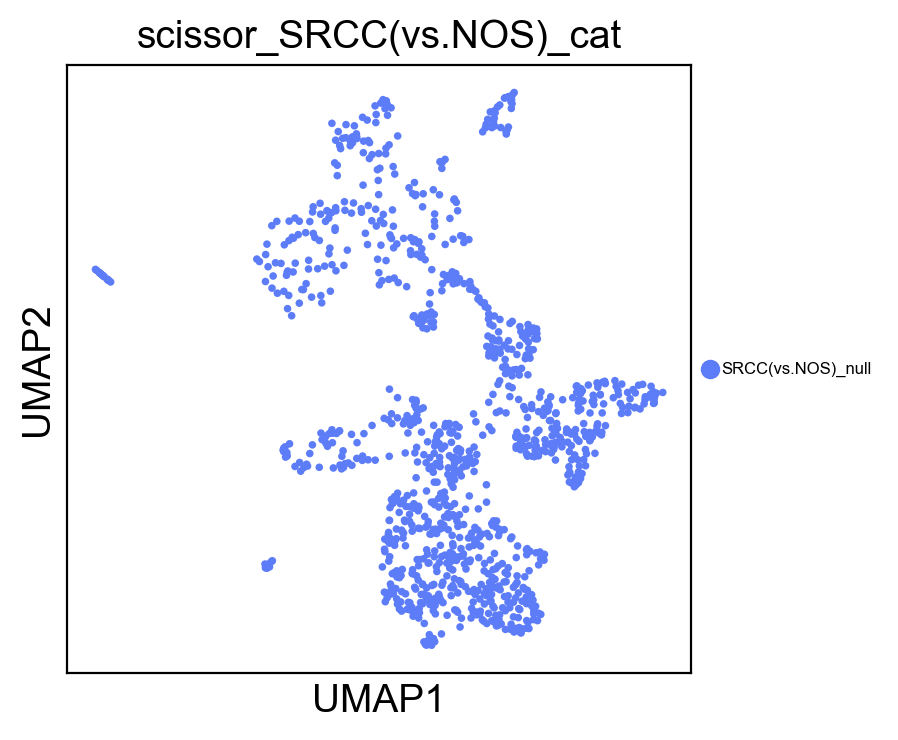

In [206]:
sc.pl.umap(adata[adata.obs['type']=='EKP'], color=['scissor_SRCC(vs.NOS)_cat'], legend_loc='right margin', palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30, save='_scissor_SRCC(vs.NOS)_in_EKP.pdf')
sc.pl.umap(adata[adata.obs['type']=='RKP'], color=['scissor_SRCC(vs.NOS)_cat'], legend_loc='right margin', palette=["#5d7cf8","#988e96","#fd1ad5"], legend_fontsize=6, size=30,  save='_scissor_SRCC(vs.NOS)_in_RKP.pdf')

In [168]:
df_1 = pd.crosstab(adata[adata.obs['type']=='EKP'].obs['celltype'], adata[adata.obs['type']=='EKP'].obs['scissor_SRCC_cat'])
df_1

scissor_SRCC_cat,SRCC_negative,SRCC_null,SRCC_positive
celltype,,,
Cd63+ cell,5,8,28
Cdk8+ cell_1,41,17,14
Runx1+ stem_1,110,6,0
Runx2/Runx3+ cell_1,121,2,0
Tgfbr1/Celf2+ prolif,36,0,0
Top2a+ prolif,57,18,9
Zeb2+ cell_1,222,15,8


In [169]:
df_2 = pd.crosstab(adata[adata.obs['type']=='RKP'].obs['celltype'], adata[adata.obs['type']=='RKP'].obs['scissor_SRCC_cat'])
df_2

scissor_SRCC_cat,SRCC_negative,SRCC_null,SRCC_positive
celltype,,,
Aqp5+ cell,90,82,31
Aqp5/Krt18+ cell,89,50,3
Aqp9+ cell,12,19,3
Cdk8+ cell_2,36,11,9
Eno1+ cell,3,5,104
Hdc/Cd24a+ cell,1,19,136
Muc1/Muc4+ cell,55,25,2
Ptma/Krt18+ cell,65,20,21
Runx1+ stem_2,41,11,0


In [170]:
df_1 = pd.crosstab(adata[adata.obs['type']=='EKP'].obs['celltype'], adata[adata.obs['type']=='EKP'].obs['scissor_DGAC_cat'])
df_1

scissor_DGAC_cat,DGAC_negative,DGAC_null,DGAC_positive
celltype,,,
Cd63+ cell,1,5,35
Cdk8+ cell_1,47,11,14
Runx1+ stem_1,114,2,0
Runx2/Runx3+ cell_1,121,2,0
Tgfbr1/Celf2+ prolif,36,0,0
Top2a+ prolif,65,11,8
Zeb2+ cell_1,233,7,5


In [171]:
df_2 = pd.crosstab(adata[adata.obs['type']=='RKP'].obs['celltype'], adata[adata.obs['type']=='RKP'].obs['scissor_DGAC_cat'])
df_2

scissor_DGAC_cat,DGAC_negative,DGAC_null,DGAC_positive
celltype,,,
Aqp5+ cell,61,97,45
Aqp5/Krt18+ cell,57,69,16
Aqp9+ cell,0,1,33
Cdk8+ cell_2,33,15,8
Eno1+ cell,14,26,72
Hdc/Cd24a+ cell,0,10,146
Muc1/Muc4+ cell,74,6,2
Ptma/Krt18+ cell,66,32,8
Runx1+ stem_2,46,6,0


In [172]:
df_1 = pd.crosstab(adata[adata.obs['type']=='EKP'].obs['celltype'], adata[adata.obs['type']=='EKP'].obs['scissor_mucinous_cat'])
df_1

scissor_mucinous_cat,mucinous_negative,mucinous_null,mucnous_positive
celltype,,,
Cd63+ cell,5,12,24
Cdk8+ cell_1,52,16,4
Runx1+ stem_1,116,0,0
Runx2/Runx3+ cell_1,123,0,0
Tgfbr1/Celf2+ prolif,36,0,0
Top2a+ prolif,51,29,4
Zeb2+ cell_1,244,1,0


In [173]:
df_2 = pd.crosstab(adata[adata.obs['type']=='RKP'].obs['celltype'], adata[adata.obs['type']=='RKP'].obs['scissor_mucinous_cat'])
df_2

scissor_mucinous_cat,mucinous_negative,mucinous_null,mucnous_positive
celltype,,,
Aqp5+ cell,61,134,8
Aqp5/Krt18+ cell,66,74,2
Aqp9+ cell,1,11,22
Cdk8+ cell_2,38,17,1
Eno1+ cell,32,60,20
Hdc/Cd24a+ cell,0,8,148
Muc1/Muc4+ cell,58,22,2
Ptma/Krt18+ cell,81,22,3
Runx1+ stem_2,52,0,0
